# Regression Case Study - Diabetes
Let's play with the complete case study using the "Diabetes" dataset. We'll demonstrate all regression methods, including Simple Linear Regression, Polynomial Linear Regression, Polynomial Linear Regression with Regularization (Ridge, Lasso, Elastic Net), Multivariable Regression, Cross Validation with different folds (3, 5, 10), and Ensemble Methods (Bagging, Boosting, Stacking). At the end, we'll visualize the results of these models for comparison.

## Setup the Dataset
Let's load the diabetes dataset from sklearn datasets. As the "Diabetes" dataset is already clean, there might not be significant data preprocessing steps required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

# No data preprocessing is required for the Diabetes dataset, as it is already clean.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

## Simple Linear Regression

In [2]:
# Create and fit the simple linear regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_slr = simple_linear_model.predict(X_train)
y_test_pred_slr = simple_linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
slr_r2_train = r2_score(y_train, y_train_pred_slr)
slr_r2_test = r2_score(y_test, y_test_pred_slr)
slr_mse_train = mean_squared_error(y_train, y_train_pred_slr)
slr_mse_test = mean_squared_error(y_test, y_test_pred_slr)

print(f"Simple Linear Regression:")
print(f"Training R-squared: {slr_r2_train:.4f}, Training MSE: {slr_mse_train:.4f}")
print(f"Testing R-squared: {slr_r2_test:.4f}, Testing MSE: {slr_mse_test:.4f}")

Simple Linear Regression:
Training R-squared: 0.5279, Training MSE: 2868.5497
Testing R-squared: 0.4526, Testing MSE: 2900.1936


## Polynomial Linear Regression

In [3]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Linear Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Linear Regression:
Best Degree: 2
Training R-squared Scores: [0.6061583502354679, 0.8772926910175939, 1.0]
Testing R-squared Scores: [0.4156399336407993, -14.56128489388842, -26.72808338195637]


## Polynomial Linear Regression with Regularization

In [4]:
# Continue with degree of 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10]

# Create and fit the Ridge, Lasso, and ElasticNet regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

    for l1_ratio in [0.2, 0.5, 0.8]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

# Find the best alpha values for Ridge, Lasso, and ElasticNet based on the testing R-squared scores
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]
best_alpha_elasticnet = alphas[np.argmax(elasticnet_r2_test_scores)]
best_l1_ratio_elasticnet = [0.2, 0.5, 0.8][np.argmax(elasticnet_r2_test_scores) // len(alphas)]

print(f"\nPolynomial Linear Regression with Regularization:")
print(f"Best Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Alpha (Lasso): {best_alpha_lasso:.4f}")
print(f"Best Alpha (ElasticNet): {best_alpha_elasticnet:.4f}")
print(f"Best l1_ratio (ElasticNet): {best_l1_ratio_elasticnet:.1f}")
print(f"Ridge Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Ridge Testing R-squared Scores: {ridge_r2_test_scores}")
print(f"Lasso Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Lasso Testing R-squared Scores: {lasso_r2_test_scores}")
print(f"ElasticNet Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"ElasticNet Testing R-squared Scores: {elasticnet_r2_test_scores}")


Polynomial Linear Regression with Regularization:
Best Alpha (Ridge): 0.0010
Best Alpha (Lasso): 0.0010
Best Alpha (ElasticNet): 0.1000
Best l1_ratio (ElasticNet): 0.2
Ridge Training R-squared Scores: [0.5738225696816799, 0.5440556284976665, 0.523889352263707, 0.44298458284557574, 0.16350659610783913]
Ridge Testing R-squared Scores: [0.5108006878947506, 0.4842953922565284, 0.46593781159184355, 0.41958874692366066, 0.161269221757383]
Lasso Training R-squared Scores: [0.5892701490358648, 0.5419119318329695, 0.5169410847799543, 0.3646309911295581, 0.0]
Lasso Testing R-squared Scores: [0.5012980759269186, 0.49076078413751045, 0.4718547867276227, 0.3575918767219113, -0.011962984778542296]
ElasticNet Training R-squared Scores: [0.5084098826948718, 0.5174639557698948, 0.526169096945057, 0.3283982611115136, 0.3856811985013552, 0.4671799800159241, 0.0708338916850505, 0.1032878083423916, 0.19726642133866978, 0.007112124669544362, 0.008901600088515704, 0.0162621249186663, 2.5348994849738737e-05,

/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


## Multivariable Regression

In [5]:
# Create and fit the multivariable regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_multi = multi_linear_model.predict(X_train)
y_test_pred_multi = multi_linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
multi_r2_train = r2_score(y_train, y_train_pred_multi)
multi_r2_test = r2_score(y_test, y_test_pred_multi)
multi_mse_train = mean_squared_error(y_train, y_train_pred_multi)
multi_mse_test = mean_squared_error(y_test, y_test_pred_multi)

print(f"\nMultivariable Regression:")
print(f"Training R-squared: {multi_r2_train:.4f}, Training MSE: {multi_mse_train:.4f}")
print(f"Testing R-squared: {multi_r2_test:.4f}, Testing MSE: {multi_mse_test:.4f}")


Multivariable Regression:
Training R-squared: 0.5279, Training MSE: 2868.5497
Testing R-squared: 0.4526, Testing MSE: 2900.1936


## Cross Validation
We will perform cross-validation using 3-folds, 5-folds, and 10-folds to assess the performance of different regression models.

In [6]:
# Define a function to perform cross-validation and calculate mean R-squared scores
def perform_cross_validation(model, X, y, cv):
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    mean_cv_score = np.mean(cv_scores)
    return mean_cv_score

# Cross-validation with 3-folds
cv_3folds_score = perform_cross_validation(multi_linear_model, X, y, cv=3)
print(f"Cross Validation (3-folds) R-squared: {cv_3folds_score:.4f}")

# Cross-validation with 5-folds
cv_5folds_score = perform_cross_validation(multi_linear_model, X, y, cv=5)
print(f"Cross Validation (5-folds) R-squared: {cv_5folds_score:.4f}")

# Cross-validation with 10-folds
cv_10folds_score = perform_cross_validation(multi_linear_model, X, y, cv=10)
print(f"Cross Validation (10-folds) R-squared: {cv_10folds_score:.4f}")

Cross Validation (3-folds) R-squared: 0.4887
Cross Validation (5-folds) R-squared: 0.4823
Cross Validation (10-folds) R-squared: 0.4620


## Ensemble Methods
Now, let's apply Ensemble Methods using Bagging, Boosting, and Stacking techniques.
### Bagging - Random Forest Regression

In [7]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression (Bagging):")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")


Random Forest Regression (Bagging):
Training R-squared: 0.9206, Training MSE: 482.5544
Testing R-squared: 0.4669, Testing MSE: 2824.4323


### Boosting - Gradient Boosting Regression

In [8]:
# Create and fit the Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
gb_r2_train = r2_score(y_train, y_train_pred_gb)
gb_r2_test = r2_score(y_test, y_test_pred_gb)
gb_mse_train = mean_squared_error(y_train, y_train_pred_gb)
gb_mse_test = mean_squared_error(y_test, y_test_pred_gb)

print(f"\nGradient Boosting Regression (Boosting):")
print(f"Training R-squared: {gb_r2_train:.4f}, Training MSE: {gb_mse_train:.4f}")
print(f"Testing R-squared: {gb_r2_test:.4f}, Testing MSE: {gb_mse_test:.4f}")


Gradient Boosting Regression (Boosting):
Training R-squared: 0.8359, Training MSE: 997.1211
Testing R-squared: 0.4529, Testing MSE: 2898.4367


### Stacking - Stacking Regressor

In [9]:
# Create a list of base models for stacking
base_models = [
    ('ridge', Ridge(alpha=best_alpha_ridge)),
    ('lasso', Lasso(alpha=best_alpha_lasso)),
    ('elasticnet', ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet))
]

# Create and fit the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=multi_linear_model)
stacking_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
stack_r2_train = r2_score(y_train, y_train_pred_stack)
stack_r2_test = r2_score(y_test, y_test_pred_stack)
stack_mse_train = mean_squared_error(y_train, y_train_pred_stack)
stack_mse_test = mean_squared_error(y_test, y_test_pred_stack)

print(f"\nStacking Regressor (Stacking):")
print(f"Training R-squared: {stack_r2_train:.4f}, Training MSE: {stack_mse_train:.4f}")
print(f"Testing R-squared: {stack_r2_test:.4f}, Testing MSE: {stack_mse_test:.4f}")


Stacking Regressor (Stacking):
Training R-squared: 0.5264, Training MSE: 2877.9006
Testing R-squared: 0.4548, Testing MSE: 2888.4670


## Visualize the Comparison
Let's visualize the R-squared scores of different regression methods. This bar chart will show the comparison of different regression methods, Cross Validation, and Ensemble Methods based on their training and testing R-squared scores. The higher the R-squared score, the better the model fits the data. The chart will help you understand which regression method performs best for the "Diabetes" dataset.

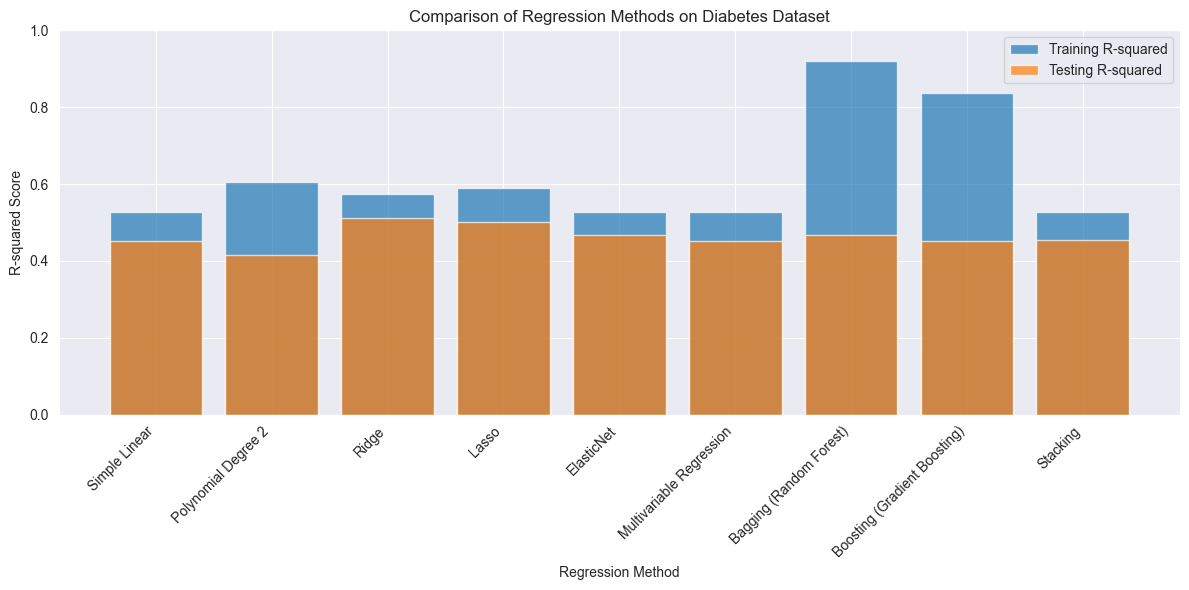

In [10]:
# Create a DataFrame to store the R-squared scores
method_names = ['Simple Linear', f'Polynomial Degree {best_degree}', 'Ridge', 'Lasso', 'ElasticNet',
                'Multivariable Regression', 'Bagging (Random Forest)', 'Boosting (Gradient Boosting)', 'Stacking']
train_r2_scores = [slr_r2_train, polynomial_r2_train_scores[np.argmax(polynomial_r2_test_scores)],
                   ridge_r2_train_scores[np.argmax(ridge_r2_test_scores)], lasso_r2_train_scores[np.argmax(lasso_r2_test_scores)],
                   elasticnet_r2_train_scores[np.argmax(elasticnet_r2_test_scores)], multi_r2_train, rf_r2_train, gb_r2_train, stack_r2_train]

test_r2_scores = [slr_r2_test, polynomial_r2_test_scores[np.argmax(polynomial_r2_test_scores)],
                  ridge_r2_test_scores[np.argmax(ridge_r2_test_scores)], lasso_r2_test_scores[np.argmax(lasso_r2_test_scores)],
                  elasticnet_r2_test_scores[np.argmax(elasticnet_r2_test_scores)], multi_r2_test, rf_r2_test, gb_r2_test, stack_r2_test]

r2_scores_df = pd.DataFrame({'Method': method_names, 'Training R-squared': train_r2_scores, 'Testing R-squared': test_r2_scores})

# Visualize the R-squared scores
plt.figure(figsize=(12, 6))
plt.bar(method_names, train_r2_scores, label='Training R-squared', alpha=0.7)
plt.bar(method_names, test_r2_scores, label='Testing R-squared', alpha=0.7)
plt.xlabel('Regression Method')
plt.ylabel('R-squared Score')
plt.title('Comparison of Regression Methods on Diabetes Dataset')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()